# Datensatz 1 (Schraubenköpfe)

Das Erstellen eigener Datensätze bietet einige Vorteile.
Um z.B. mit einfachen Modellen starten zu können, sollte auch die Lernaufgabe zunächst so einfach wie möglich und so schwierig wie nötig gestaltet sein. Ein eigener Datensatz lässt sich sehr gut auf das Projekt zuschneiden. So ist es einfacher das Modell besser zu verstehen und nachvollziehen zu können.


Um einfach zu beginnen, konzentrieren wir uns zunächst auf eine Eigenschaft der Schraube, dem Kopf bzw. der Antriebsart (Kreuzschlitz, Torx, Sechskant, usw.) und nehmen dafür einfache Grafiken, die sehr gut zu unterscheiden sind, damit sich das Modell nur auf die Form konzentrieren kann und nicht von Lichteinflüssen wie in realen Umgebungen beeinflusst wird. Die Auswahl viel auf folgende gängigen Antriebsarten:
- Innensechskant (Inbus)
- Philips (Kreuzschlitz)
- Pozidriv (Kreuzschlitz)
- Sechskant
- Torx

Diese sind, zumindest für das menschliche Auge, gut zu unterscheiden und sollten von einem Modell, welches mit den MNIST-Daten funktioniert auch gut erkannt werden können.

Es gibt jedoch auch schon gewisse Schwierigkeiten:
- Innensechskant und Torx ähneln sich, schwarzer Ring auf weißem Hintergrund, Innenkontur auch ähnlich
- Philips-Kreuzschlitz und Pozidriv-Kreuzschlitz sind nur durch die Einkerbungen im Pozidrivkopf zu unterscheiden
- Das Sechskant-Profil lässt sich von Allen am deutlichsten unterscheiden

Es ist zu erwarten, dass die Modelle mit dem Sechskant weniger Schwierigkeiten haben werden als mit den anderen Profilen.

So sollte dieser Datensatz einfach genug für den Anfang sein aber bringt auch schon die ersten Schwierigkeiten mit sich, welche die Performance der verschiedenen Modelle auf die Probe stellen.


Die Wahl fiel nun auf die 5 Klassen (Innensechskant, Philips, Pozidriv, Sechskant, Torx). Diese Schrauben Kategorien soll der Datensatz enthalten. Zu jeder Klasse existiert ein Bild. Aus diesen 5 Bildern soll nun einen Datensatz mit mehreren tausend Bildern künstlich erzeugt werden.

Da ein Datensatz, bestehend aus identischen Bildern keinen Sinn ergibt, da ein Modell ja in der Lage sein soll neue, aber ähnliche Bilder zu erkennen, muss es auch entsprechend trainiert werden, d.h. mit vielen verschiedenen Bildern je Kategorie.

Image Data Generator:
- in Tensorflow/Keras enthalten
- ist in der Lage vorhandene Bilder zu transformieren (shift, rotate, roll, usw.) um den Trainingsdatensatz künstlich zu vergrößern


## Bilder anzeigen

Der Datensatz 1 wird aus nur 5 Bildern erzeugt. Die Bilder stellen die Schraubenköpfe Symbolartig dar. Desweiteren sind die Bilder 28 x 28 Pixel groß.

In [3]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
pozidriv = mpimg.imread('0_Schraubenkopfbilder_28x28/pozidriv/pozidriv 28x28_gray.jpg')
philips = mpimg.imread('0_Schraubenkopfbilder_28x28/philips/philips 28x28_gray.jpg')
innensechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/innensechskant/innensechskant 28x28_gray.jpg')
sechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/sechskant/sechskant 28x28_gray.jpg')
torx = mpimg.imread('0_Schraubenkopfbilder_28x28/torx/torx 28x28_gray.jpg')

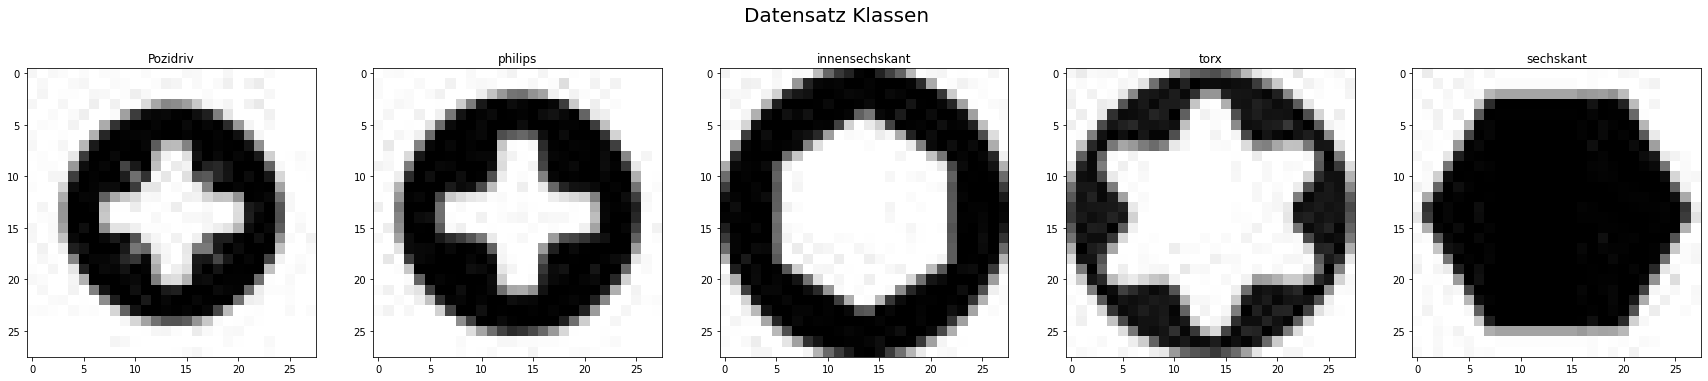

In [5]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 5, 1)
plt.title('Pozidriv')
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('philips')
plt.imshow(philips, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('innensechskant')
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('torx')
plt.imshow(torx, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('sechskant')
plt.imshow(sechskant, cmap='gray')

plt.suptitle('Datensatz Klassen', fontsize=20)
#plt.subplots_adjust(left=0.2, wspace=0.4, top=0.8)
plt.show()

Der Datensatz dient zum Trainieren und Testen der künstlichen neuronalen Netze. Es gibt verschiedene Wege einen Datensatz von Schraubenbildern zu erzeugen:
 - virtuelle 3D Objekte mit Hilfe von CAD darstellen und daraus Bilder mit unterschiedlichen Ausrichtungen erzeugen
 - Schraubenbilder aus Herstellerkatalogen oder dem Internet extrahieren
 - Eigene Bilder mit einer Kamera anfertigen

In dieser Arbeit werden die letzteren beiden Varianten vorgestellt. Zunächst wird gezeigt, wie aus wenigen externen Bildern ein Datensatz künstlich erzeugt werden kann. Diese künstlich erzeugten Daten besteht aus sehr wenigen Ursprungsbildern, die künstlich transformiert werden, um somit weitere, neue Bilder zu generieren.


## Datensatz aus wenigen Bildern

Dieser Erste Datensatz dient dazu, zu zeigen wie vorhandene Bilder künstlich leichten Veränderungen unterzogen werden können, um somit dem Modell einen umfangreicheren Trainingssatz bereit zu stellen. Des Weiteren werden in diesem künstlichen Datensatz lediglich verschiedene Schraubenkopfformen mit gleicher Ausrichtung verwendet. 

Als Einführung in das Thema Bilderkennung mit Neuronalen Netzen, wird eine einfache Bilderkennung mit Hilfe der Logistischen Regression erstellt. Die Logistischen Regression, ist sehr viel weniger leistungsfähig als ein NN.
Aus diesen Bildern wird nun ein Datensatz erzeugt. Die Bilder werden mit Hilfe des "Image Data Generators" transformiert, d.h durch Rotation, Zoom, Verschiebung werden neue Varianten der Bilder generiert.


## Image Data Generator (Konfiguration)

**1. Random Rotations**  
Die Bildrotation ist eine weit verbreitete Augmentationstechnike und ermöglicht es dem Modell, gegenüber der Ausrichtung des Objekts toleranter zu werden.
Mit der ImageDataGenerator-Klasse können Bilder zufällig um einen beliebigen Winkel zwischen 0 und 360 Grad gedreht werden, indem Sie einen ganzzahligen Wert im rotation_range-Argument angeben.
Wenn das Bild gedreht wird, bewegen sich einige Pixel aus dem Bild heraus und hinterlassen einen leeren Bereich, der ausgefüllt werden muss.
Die Füllung kann auf verschiedene Arten geschehen, z. B. mit einem konstanten Wert oder den nächsten Pixelwerten usw.
Dies wird im Argument fill_mode angegeben und der Standardwert ist „nearest“, wodurch einfach der leere Bereich durch die nächsten Pixelwerte ersetzt wird.

**2. Random Shifts**
Es kann vorkommen, dass sich das Objekt nicht immer in der Mitte des Bildes befindet.
Um das Modell darauf vorzubereiten, können die Pixel des Bildes entweder horizontal oder vertikal verschieben; Dies geschieht durch Hinzufügen eines bestimmten konstanten Werts zu allen Pixeln.
Die ImageDataGenerator-Klasse hat das Argument height_shift_range für eine vertikale Bildverschiebung und width_shift_range für eine horizontale Bildverschiebung.
Wenn der Wert eine Gleitkommazahl ist, würde dies den Prozentsatz der Breite oder Höhe des zu verschiebenden Bildes angeben.
Andernfalls, wenn es sich um einen ganzzahligen Wert handelt, wird einfach die Breite oder Höhe um diese vielen Pixelwerte verschoben.

**3. Random Flips**
Das Spiegeln von Bildern ist auch eine großartige Augmentationstechnik und es ist sinnvoll, sie mit vielen verschiedenen Objekten zu verwenden.
Die ImageDataGenerator-Klasse hat die Parameter horizontal_flip und vertical_flip zum Spiegeln entlang der vertikalen oder horizontalen Achse.
Diese Technik sollte jedoch dem Objekt im Bild entsprechen.
Zum Beispiel wäre das vertikale Umdrehen eines Autos keine sinnvolle Sache im Vergleich zu einem symmetrischen Objekt wie einem Fußball oder etwas anderem.

**4. Random Brightness**
Es ändert zufällig die Helligkeit des Bildes. Es ist auch eine sehr nützliche Augmentationstechnik, da das Objekt die meiste Zeit nicht unter perfekten Lichtbedingungen steht.
Daher ist es unerlässlich, unser Modell auf Bildern unter verschiedenen Lichtbedingungen zu trainieren.
Die Helligkeit kann in der ImageDataGenrator-Klasse über das Brightness_range-Argument gesteuert werden.
Es akzeptiert eine Liste mit zwei Float-Werten und wählt einen Helligkeitsverschiebungswert aus diesem Bereich aus. 

**5. Random Zoom**
Das Zoom-Augmentationsverfahren wird zum Zoomen des Bildes verwendet. Diese Methode zoomt das Bild nach dem Zufallsprinzip entweder durch Vergrößern oder fügt einige Pixel um das Bild herum hinzu, um das Bild zu vergrößern. Diese Methode verwendet das Zoom_range-Argument der ImageDataGenerator-Klasse. Der Zoomwert kann entweder in einem Float, einem Bereich in Form eines Arrays oder einem Python-Tupel angegeben werden.
Wenn der Wert des Zoom-in mit Float-Wert angegeben wird, dann ist es [1-floatValue, 1+floatValue]. Wenn wir beispielsweise den Float-Wert als 0,5 angeben, wird er tatsächlich wie [0,5, 1,5], wenn wir im ersten Bereich 0,5 von 1 subtrahieren und im zweiten Bereich 0,5 zu 1 addieren, was tatsächlich eine Vergrößerung um 50 % und bedeutet 150 % verkleinern.
Zoom hat auch einige Grenzwerte, wie wir es im Fall des Helligkeitsparameters haben. Ein Zoomwert von weniger als 1,0 vergrößert das Bild, und ein Wert von mehr als 1,0 verkleinert das Bild.
Zum Beispiel: [0.6,0.6], in diesem Bereich vergrößert der Zoom das Bild, was bedeutet, dass das Objekt des Bildes um 60 % größer wird oder näher kommt, und wenn der Wert größer als 1,0 ist, z.B. [1.6, 1.6] zoomt das Bild um 60 % heraus.

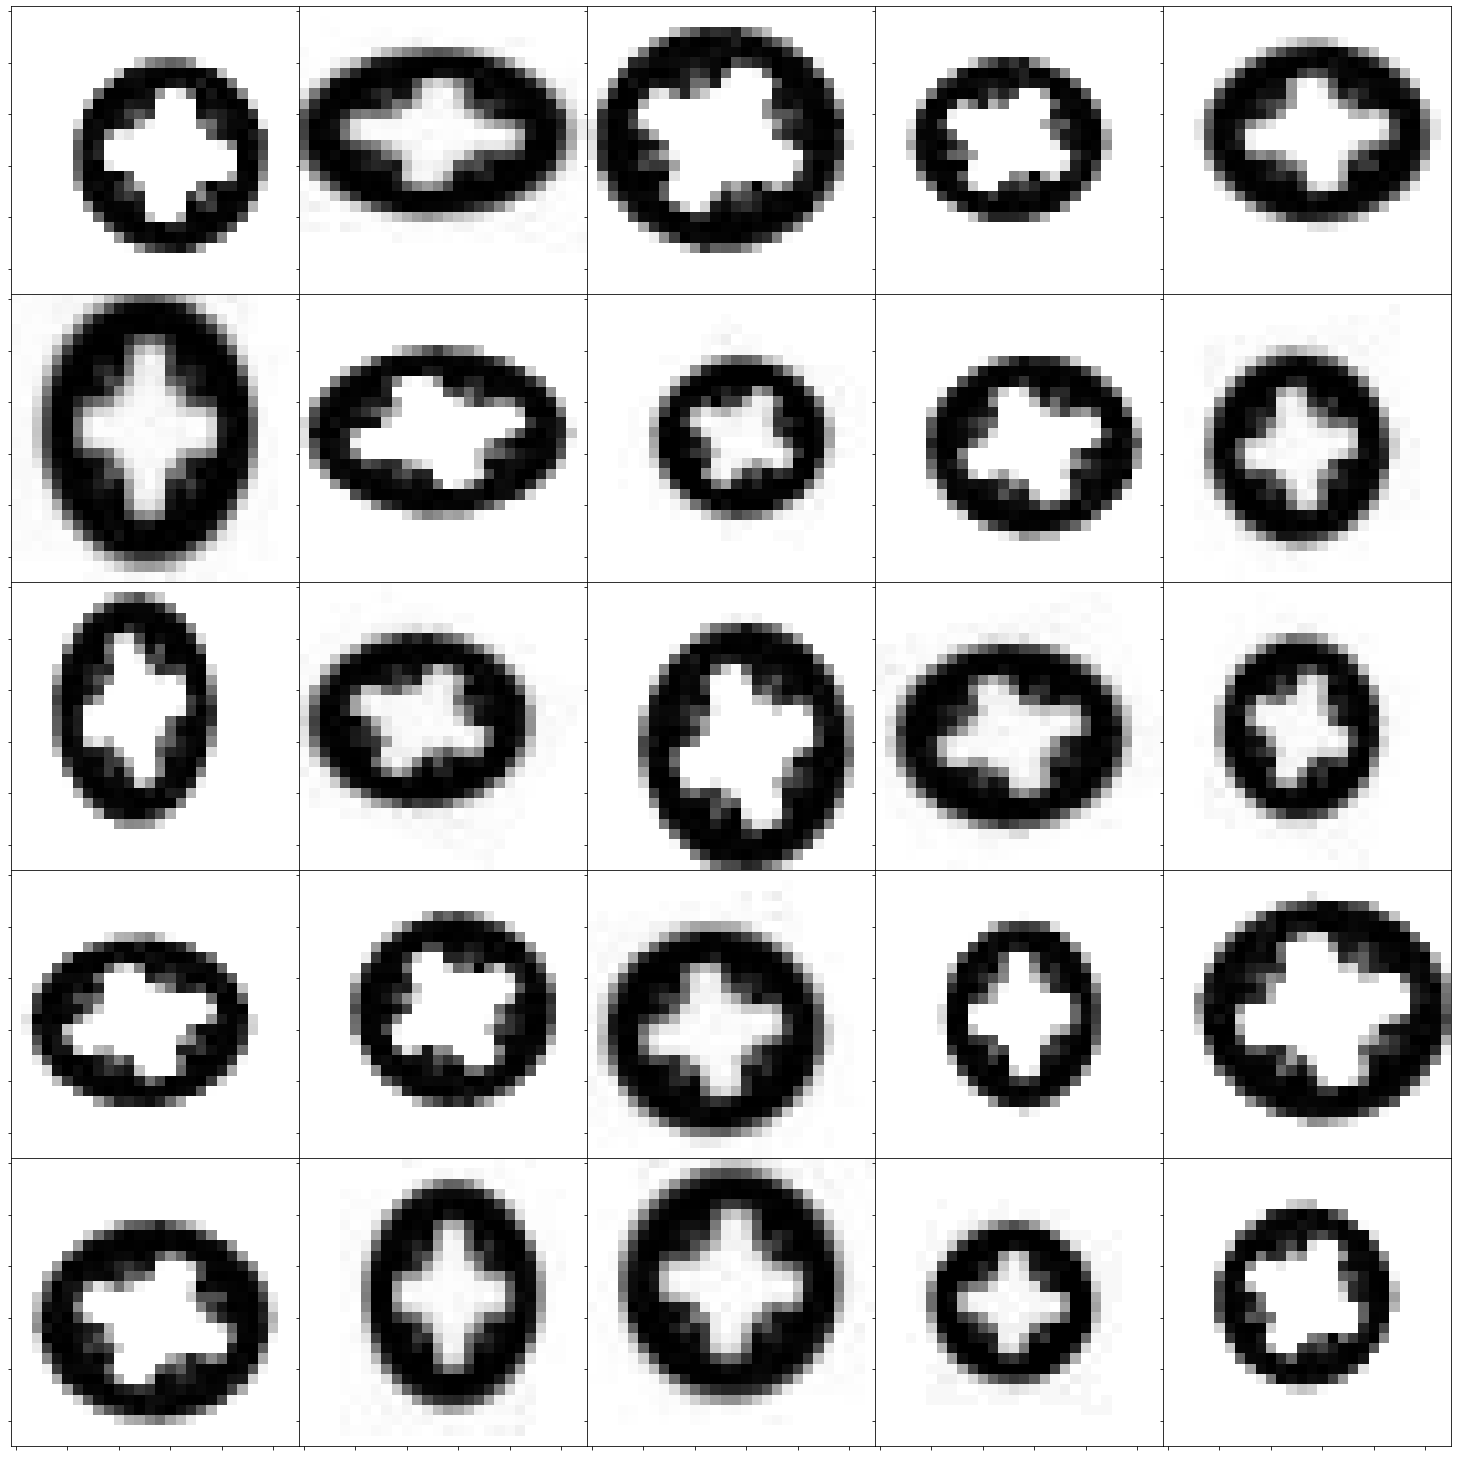

In [6]:
from matplotlib import gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

img = pozidriv.reshape(1,28,28,1)





# brightness_range=(0.2, 0.8): 0 = min, 1 = max 
# fill_mode='constant',cval=255,
# width_shift_range=2.0,
# height_shift_range=2.0,
# shear_range=0.0,
# zoom_range=0.20,

# ImageDataGenerator konfigurieren
datagen = ImageDataGenerator(rotation_range=30,
                             brightness_range=[0.1,1.9],
                             fill_mode='constant',cval=255,
                             width_shift_range=2.0,
                             height_shift_range=2.0,
                             shear_range=0.0,
                             zoom_range=[0.8,1.4],
                             channel_shift_range=0.0,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.0,)


# von: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
# iterator
aug_iter = datagen.flow(img, batch_size=1)



nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24)) 
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')
        ax= plt.subplot(gs[i,j])
        ax.imshow(image,cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Image Data Generator (Speichern)

Mit dem konfigurierten Generator die Bilder klassenweise erzeugen und speichern.

````
# Bild laden
image = sechskant.reshape(1,28,28,1)



# iterate

itr = datagen.flow(
    image,
    shuffle=True,
    save_to_dir='dataset_28x28/sechskant',
    save_prefix='sechskant',
    save_format='png',
    
)

# Samples in Ordner schreiben
for i in range(0,2001):
    itr.next()
````

Die Bilder der Klassen können unterschiedlich stark transformiert werden.

## Label erzeugen

Die künstlich erzeugten Bilder wurden nach Klassen sortiert.  
Nun wird aus dieser Ordner Struktur ein Datensatz mit Labels erzeugt (image_dataset).
Die folgende Ordnerstruktur sollte verwendet werden:

main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

````
# training_data anlegen
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
image_dataset = []

# Bildgröße
IMG_SIZE=28

# rel. Pfad Datensatz Hauptordner
DATADIR = 'dataset_28x28'

# Klassen / Unterordner
CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']


# Bilder und Kategorien in ein ... speichern:

def create_image_dataset():
    for category in CATEGORIES:  # jede Klasse

        path = os.path.join(DATADIR,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification ( 0= 1=

        for img in tqdm(os.listdir(path)):  # iterate over each image per Category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                image_dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_image_dataset()

print(len(image_dataset))
````

````
X = []
y = []

for features,label in image_dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
````

## Datensatz mischen

````python
from sklearn.utils import shuffle
import numpy as np


X, y = shuffle(X, y)
````

## Datensatz aufteilen

Die Bilder **X** und die entsprechenden Labels **y** werden nun noch aufgeteilt.

````python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
````

In [ ]:
# load numpy array from npy file

# load array

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

## Datensatz Vorschau

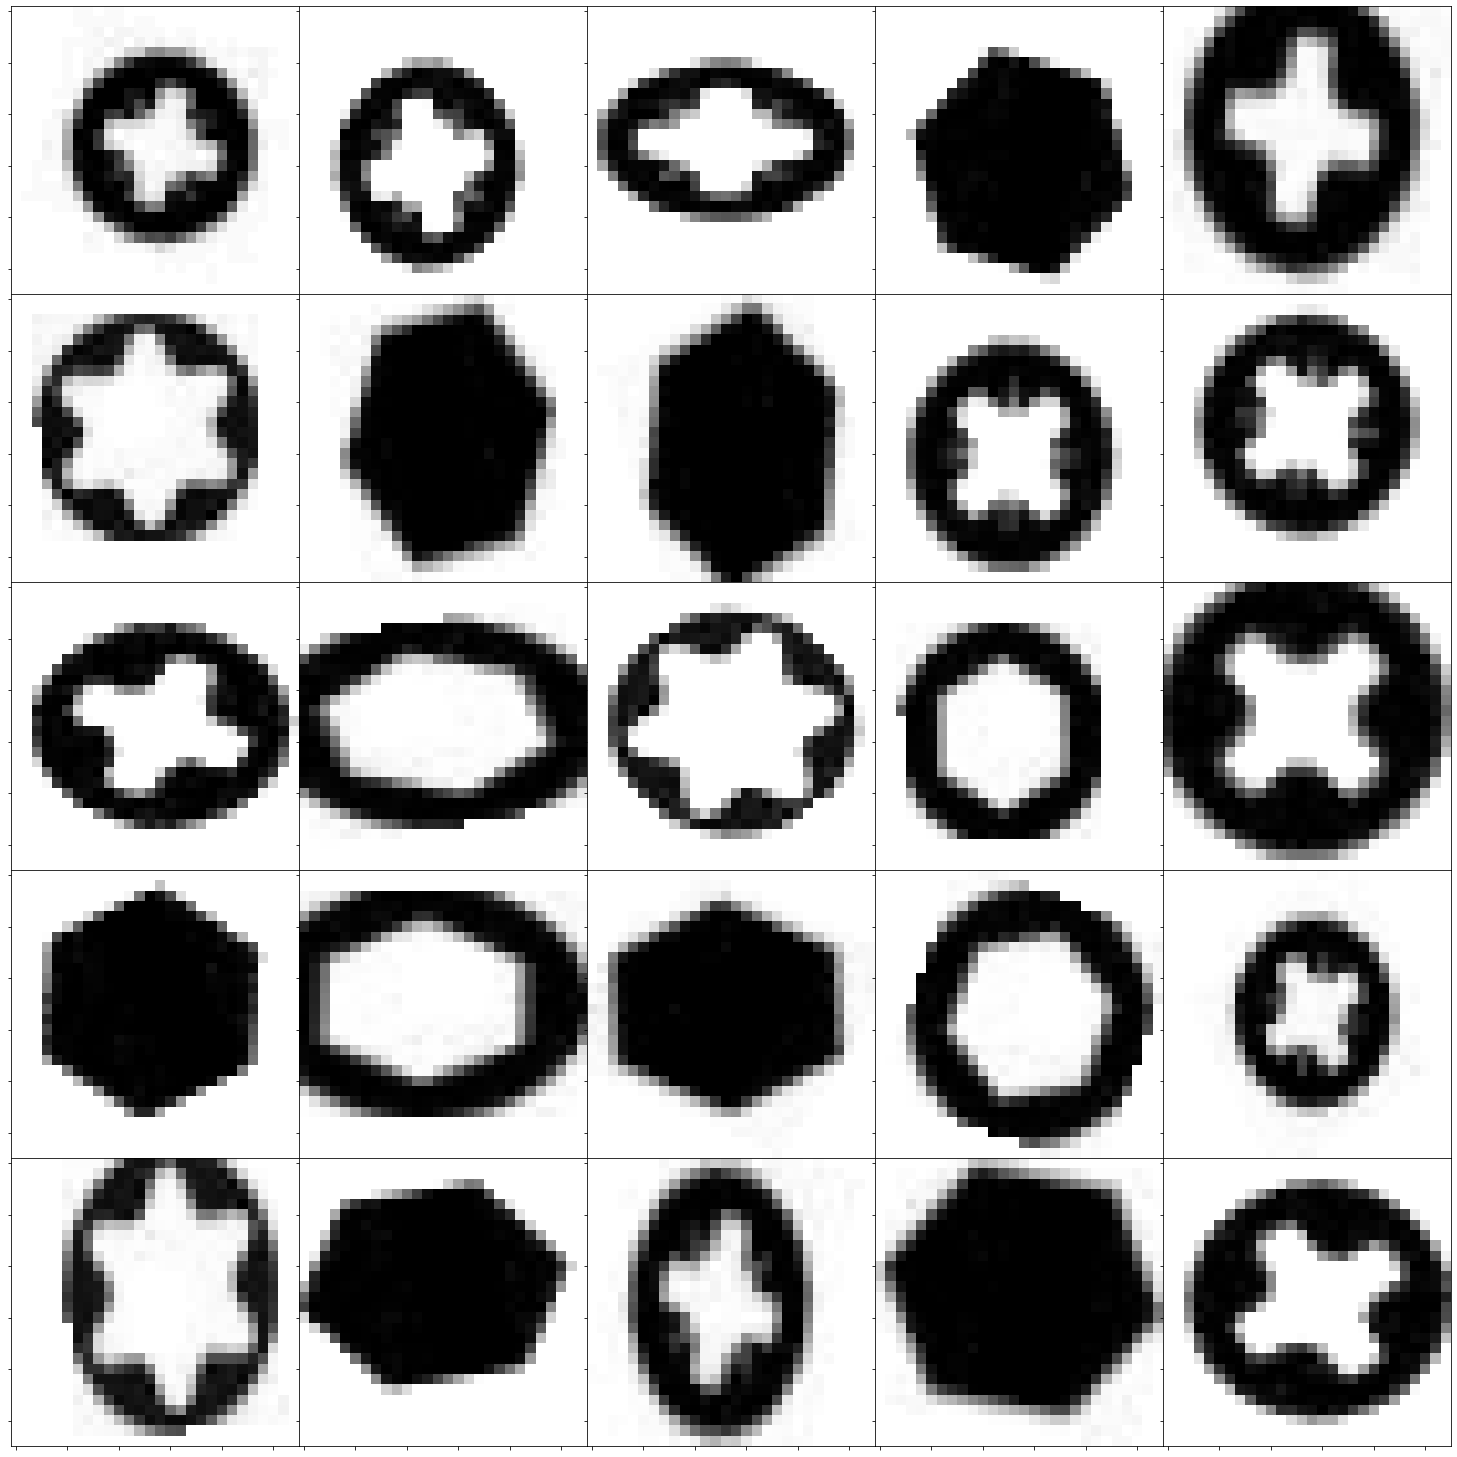

In [144]:
nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))
'''
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1))
'''
im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_train[im,:,:,0].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Datensatz untersuchen

Wie sieht der Datensatz aus? wurden die Bilder gemischt oder sind sie immer noch nach Klassen sortiert?

In [147]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(6421, 28, 28, 1)
(2753, 28, 28, 1)
6421
2753


1


<function matplotlib.pyplot.show(close=None, block=None)>

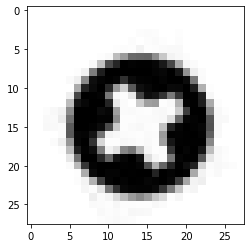

In [148]:
# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

i=2348
print(y_test[i])
plt.imshow(X_test[i],cmap='gray',vmin=0,vmax=255)
plt.show

## Datensatz exportieren

```python
from numpy import save, load

# save to npy file
save('Dataset_28x28/X_train.npy', X_train)
save('Dataset_28x28/y_train.npy', y_train)
save('Dataset_28x28/X_test.npy', X_test)
save('Dataset_28x28/y_test.npy', y_test)

```